### Import of packages


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')

### Creating test signal

Frequencies: [16 36 94 70 17]


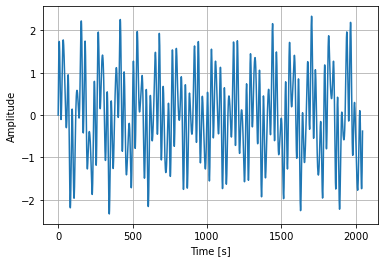

In [2]:
class Signal:
    def __init__(self, samples, num_of_freq):
        self.samples = samples
        self.x = np.arange(samples)
        self.num_of_freq = num_of_freq
        #Creating output signal
        self.out()

    def sin_wave(self, f):
        a = np.random.random()
        return a * np.sin(2*np.pi * f * (self.x/self.samples))
    def rand_freq(self):
        return np.random.randint(1,100,self.num_of_freq)
    def out(self):
        self.freqs = self.rand_freq()
        y = [self.sin_wave(f) for f in self.freqs]
        y_array = np.array(y)
        self.y = np.sum(y_array, 0)
        


sig1 = Signal(2048, 5)
# print(sig1.x)
# print(sig1.y)
print(f'Frequencies: {sig1.freqs}')
plt.plot(sig1.x, sig1.y)
plt.grid()
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.savefig('destination_path.eps', format='eps')



### Spectrum plot function

In [3]:
def show_spectrum_plot(sig):
    N = len(sig)
    T = 1/N
    xf = np.linspace(0 , 1.0/(2.0*T), N//2)
    yf = sig
    fig, ax = plt.subplots()
    yf = yf * 2/N
    yf = np.abs(yf[:N//2])
    ax.plot(xf, yf)
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Amplituda')
    
    plt.grid()
    plt.xlim(0, 110)
    plt.show()

### DFT slow

Frequencies: [16 17 36 70 94]


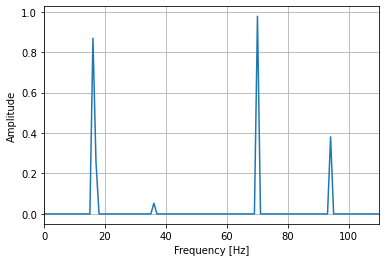

In [4]:
from algorithms.dft_slow import dft_slow
y_dft = dft_slow(sig1.y)

print(f'Frequencies: {np.sort(sig1.freqs)}')
show_spectrum_plot(y_dft)

# Cooley-Tukey algortihms
### FFT - recursive implementation 

Frequencies: [16 17 36 70 94]


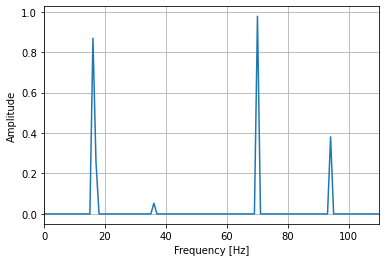

In [5]:
from algorithms.fft_recursive import fft_recursive
y_fft_rec = fft_recursive(sig1.y)

print(f'Frequencies: {np.sort(sig1.freqs)}')
show_spectrum_plot(y_fft_rec)

### FFT - iterative implementation 

Frequencies: [19 23 32 87 94]


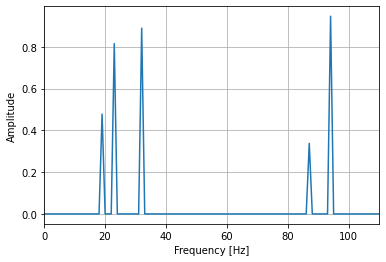

In [17]:
from algorithms.fft_iterative import fft_iterative
y_fft_it = fft_iterative(sig1.y)

print(f'Frequencies: {np.sort(sig1.freqs)}')
show_spectrum_plot(y_fft_it)


### Built fft function in Numpy

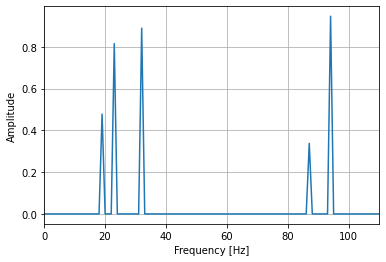

In [18]:
y_fft_np = np.fft.fft(sig1.y)  
show_spectrum_plot(y_fft_np)


In [19]:
%timeit dft_slow(sig1.y)
%timeit fft_recursive(sig1.y)
%timeit fft_iterative(sig1.y)
%timeit np.fft.fft(sig1.y)

349 ms ± 5.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.56 ms ± 392 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
689 µs ± 43.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
33.1 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
